# "Convergence Analytics: Integrating CSV, API, and Web Data for Apple Stock Analysis"
## Ashley Love

## Contents
1. [Introduction](#1.-Introduction)
    1.1 [List of Sources](#1.1-List-of-Sources)
    1.2[Description of What Data is Included](#1.2-Description-of-What-Data-is-Included)
    1.3[What the Fields Mean](#1.3-What-the-Fields-Mean)
    1.4[The Relationship Between Data Sources](#1.4-The-Relationship-Between-Data-Sources)
    1.5[How to Accomplish all 5 MileStones](#1.5-How-to-Accmplish-all-5-MileStones)
    1.6[My Interpretation is of what the Data Means](#1.6-My-Interpretation-is-of-what-the-Data-Means)
    1.7[To be Done to Accomplish the 5 Milestones](#1.7-To-be-Done-to-Accomplish-the-5-Milestones)
    1.8[My Interpretation of What the Data Means](#1.8-My-Interpretation-of-What-the-Data-Means)
    
2. [Cleaning/Formatting Flat File Source](#2.-Instructions)
    2.1[Preview Data](#2.1-Preview-Data)
    2.2[Correct Missing Values](#2.2-Correct-Missing-Values)
    2.3[Convert Date Column into Datetime Format](#2.3-Convert-Date-Column-into-Datetime-Format)
    2.4[Replace Headers](#2.4-Replace-Headers)
    2.5[Check for Duplicates](#2.5-Check-for-Duplicates)
    2.6[Add New](#2.6-Add-New)
    2.7[Fix Casing or Inconsistent Values](#2.7-Fix-Casing-or-Inconsistent-Values)
    2.8[Conduct Fuzzy Matching](#2.8-Conduct-Fuzzy-Matching)
   
   
3. [Cleaning/Formatting API Data](Cleaning/Formatting-API-Data)
    3.1[Instructions](#3.1-Instructions)
    3.2[STEPS to Accomplish Cleaning/Formatting API Data](#3.2-STEPS-to-Accomplish-Cleaning/Formatting-API-Data)
    3.3[Cleaning and Formatting with API Data](#3.3-Cleaning-and-Formatting-with-API-Data)
    3.4[Identification of Outliers and BoxPlot](#3.4-Identification-of-Outliers-and-BoxPlot)
    3.5[Handling Extreme Outliers](#3.5-Handling-Extreme-Outliers)
    3.6[Moving Averages Addition](#3.6-Moving-Averages-Addition)
    3.7[Outcome for Cleaning/Formatting API Data](#3.7-Outcome-for-Cleaning/Formatting-API-Data)

4.  [Cleaning/Formatting Website Data](Cleaning/Formatting-Website-Data)
    4.1[Instructions](#4.1-Instructions)
    4.2[STEPS to Accomplish Cleaning/Formatting Website Data](#4.2-STEPS-to-Accomplish-Cleaning/Formatting-Website-Data)
    4.3[Cleaning and Formatting with API Data](#3.3-Cleaning-and-Formatting-with-API-Data)
    4.4[Data Aquisition with yfinance](#4.4-Data-Aquisition-with-yfinance)
5. [Instructions](Instructions)
    5.1[Database Creation and Table Popluation](#5.1-Database-Creation-and-Table-Population)
    5.2[Mergind Data with SQL Query](#5.2-Merging-Data-with-SQL-Query)
    5.3[Visualization](#5.3-Visualization)
    
   
    

    

# 1.-Introduction

This notebook aims to demonstrate how to integrate different data sources to perform a comprehensive analysis of Apple Inc.'s stock performance.

## 1.1-List of Sources

### CSV File: 
Source: Kaggle Dataset 'AAPL_historical_data.csv' from 'https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data'

### API:
Source: Alpha Vantage API from 'https://www.alphavantage.co/query'

### Website:
Source: Yahoo Finance Historical Data for Apple 'https://finance.yahoo.com/quote/AAPL/'


## 1.2-Description of What Data is Included

### 1. Source: Kaggle Dataset 'AAPL_historical_data.csv' 
'https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data'
- Dataset: Apple Stock Prices - Daily
- Fields: Date, Open, High, Low, Close, Adjusted Close, Volume
- Description: Contains historical stock prices for Apple Inc. including daily open, close, high, low prices, and trading volume from 1980 to accesspoint.

### 2. Source: Alpha Vantage API 
'https://www.alphavantage.co/query'
- Endpoint: 'https://www.alphavantage.co/query'
- Function: TIME_SERIES_DAILY
- API Key: 'KMX7FFHODSLGIIKX'
- Fields: Timestamp, open, high, low, close, volume
- Description:Provides real-time and historical stock data for Apple Inc.

### 3. Source: Yahoo Finance: Data for Apple 
'https://finance.yahoo.com/quote/AAPL/'
- Fields: Date, open, High, Low, Close, Adjusted Close, Volume
- Desciption:Comprehensive daily and historical stock data for Apple Inc.
                                               

## 1.3-What the Fields Mean 
(Navigate to the source for each of these provided datasets and review the code book or any other sources of information provided about what the data means)

### Using a Downloaded Path for CSV
- import required library, pandas
- download the dataset from Kaggle, https://www.kaggle.com/datasets/tarunpaparaju/apple-aapl-historical-stock-data and save it to Jupyter
- requires a Kaggle account, this is free (already obtained from a previous class)
- use the read_csv function from pandas to lead the data from csv file
- provide a path to the file
- explore the data, print the head and information about the data

### Using API
- import json to later validate that this is a JSON API source
- obtain an api key from Alpha Vantage
- define api endpoint and my api key
- import TimeSeries from alpha_vantage
- apply API key from creating an account (free) with Alpha Vantage; https://www.alphavantage.co/, for my use purposes only
- introduce the parameter where ts is equal to time series, provide the api key and output viewing format, which is json format
- using the .get() method obtain the time series, my parameters is the monthly adjusted, and apply the ticker for apple "AAPL"
- run the cell and call the data to print


### Review the Codebook for Website
- import the libraries needed for web scraping : selenium and bs4 for BeautifulSoup
- identify the URL
- make a request to Yahoo Finance for Apple's stock page
- create a BeautifulSoup object, parsing the HTML content of the page with BSoup
- call the soup to cell and print for viewing purposes
 Locate the Stock Price:
- inspect the Yahoo Finance Webpage to find HTML elements associated with the current stock price. 
- performed using web developer tools (right click and inspect).
- this was located in a span tag with the attributes
 Print the stock price:
- display the retrieved stock price
- applying an if and else statement for coding clarity

## 1.4-The-Relationship-Between-Data-Sources

    Kaggle, Alpha Vantage, and Yahoo Finance are common platforms presenting financial data, incorporating stock evidence for Apple Inc (AAPL). Although each source contributes the similar purpose of producing financial data, there are differentiations in how they prepare this information, including format, availability, and accessibility.
    Kaggle, opted for the use of a CVS file, is recognized for data science contests and datasets, often allocated by community members or assembled from public sources. The Apple Historical Data CSV file on Kaggle is a constructed dataset that of which contains daily stock information. Such as opening and closing prices, highs and lows, trading volume, and adjusted prices for Apple Inc. As these files are stationary, they suggest but only a snapshot at the time they were transferred or constructed. That of  which is exceptional for historic data analysis. This may involve manual updates for the newest information.
    Alpha Vantage provides real-time and historical stock data through an API. For Apple Inc., data can be retrieved daily, weekly, or even intraday via data points in a programmatically suitable approach. Making this suitable  for purposes that involve live or repeated data updates. It often outputs data in JSON or CSV format. My intent and purpose, regarding JSON formatting. The API is useful for automation and integration into financial applications or analytical models, with different data points available depending on subscription levels.
    Yahoo Finance is an ample reserve for market data, offering real-time tracking, historical data, financial news, and analysis. AAPL stock information can be retrieved through their website or API, providing similar data points as the other sources. Yahoo Finance offers user-friendly interfaces and extensive context, such as financial news and reports, contributing to a richer understanding of market trends.
    In summary, these data sources appear to overlap in context. As all three platforms provide historical and real-time data for AAPL stocks. Containing the fields of: Date and or Time Stamp, Open, High, Low, Close, Adjusted Close, and Volume of APPL stock price. Kaggle provides only static datasets, both AlphaVantage and Yahoo Finance offer dynamic data access. That is crucial for activities requiring up to date information. Data from any of these sources can be used to perform technical analysis, develop trading algorithms or assess historical performance trends of AAPL. Each source has its own unique characteristics and advantages, and is chosen by users depending on their specific needs like real-time updates, analysis, or educational purposes.


In [15]:
text = """Kaggle, Alpha Vantage, and Yahoo Finance are common platforms presenting financial data, incorporating stock evidence for Apple Inc (AAPL). Although each source contributes the similar purpose of producing financial data, there are differentiations in how they prepare this information, including format, availability, and accessibility.
Kaggle, opted for the use of a CVS file, is recognized for data science contests and datasets, often allocated by community members or assembled from public sources. The Apple Historical Data CSV file on Kaggle is a constructed dataset that of which contains daily stock information. Such as opening and closing prices, highs and lows, trading volume, and adjusted prices for Apple Inc. As these files are stationary, they suggest but only a snapshot at the time they were transferred or constructed. That of  which is exceptional for historic data analysis. This may involve manual updates for the newest information.
Alpha Vantage provides real-time and historical stock data through an API. For Apple Inc., data can be retrieved daily, weekly, or even intraday via data points in a programmatically suitable approach. Making this suitable  for purposes that involve live or repeated data updates. It often outputs data in JSON or CSV format. My intent and purpose, regarding JSON formatting. The API is useful for automation and integration into financial applications or analytical models, with different data points available depending on subscription levels.
Yahoo Finance is an ample reserve for market data, offering real-time tracking, historical data, financial news, and analysis. AAPL stock information can be retrieved through their website or API, providing similar data points as the other sources. Yahoo Finance offers user-friendly interfaces and extensive context, such as financial news and reports, contributing to a richer understanding of market trends.
In summary, these data sources appear to overlap in context. As all three platforms provide historical and real-time data for AAPL stocks. Containing the fields of: Date and or Time Stamp, Open, High, Low, Close, Adjusted Close, and Volume of APPL stock price. Kaggle provides only static datasets, both AlphaVantage and Yahoo Finance offer dynamic data access. That is crucial for activities requiring up to date information. Data from any of these sources can be used to perform technical analysis, develop trading algorithms or assess historical performance trends of AAPL. Each source has its own unique characteristics and advantages, and is chosen by users depending on their specific needs like real-time updates, analysis, or educational purposes."""

In [16]:
# Split the text by whitespace to get words and count them
words = text.split()
word_count = len(words)

print(f"Word Count: {word_count}")

Word Count: 401


## 1.5-To be Done to Accomplish the 5 Milestones

To tackle this project, I will  need to integrate and analyze data from three different sources: a flat file, a website (HTML source), and an API (JSON source). Here's a step-by-step guide as to how I will achieve this:

1. Understand and Extract Data from Each Source:
* Flat File(CSV):
Goal: To Read and understand the structure of my csv file.
Method: Use Python along with libraries like pandas to load and read the file. 
Focus: To identify key columns and data types.

* API(JSON): 
Goal: Fetch data from the API endpoint pertaining to AAPL. 
Method: Utilize Python’s requests library to get and parse JSON data.

* HTML source: 
Goal: Scrape and parse the data from the Yahoo Finance AAPL webpage.
Method: Use web scraping libraries like Selenium, and BeautifulSoup in Python.

2. Data Cleaning and Formatting:
* a) CSV Data: aapl_histoic_data.csv: Explore the data by calling the head, obtaining a summary statistics, checking for missing values, and performing cleaning of data. (eg. Removing rows with missing values, filling in missing values with either specific values or with a mean, median, or mode, removing duplicates, renaming columns, changing data types, or handling outliers with statistical methods (such as a z-score) or to remove or transform those outliers. 
* b) API : Alpha Vantage API: Exploring the data by examining the structure of the JSON response, and identifying the relevant fields I will need for my analysis. Cleaning the data by handling missing values, dropping rows or columns with missing values, or filling them in via df.dropna() or df.fillna(), removing any duplicates, standardizing data types by converting to the correct formants (eg. Strings to dates, numbers to floats) with pd.to_datetime()/pd.to_numeric(). Cleaning the text data by removing unwanted characters, whitespace or html tags using regular expressions, and standardizing the  capitalized, punctuation or other text formatting. Formatting the data via reshape with df.pivot(), df.melt() or df.stack(). Creating new columns if need be using df.apply(). Sorting the data with df.sort_values(). Filtering the data based on certain conditions using df.query() or Boolean indexing. Finally, saving and exporting the data. 
* c) HTML source: Yahoo Finance AAPL: Scrape and inspect the data via Selenium also creating a function. Parsing the HTML via BeautifulSoup , extracting all headers, and data rows. Creating a Pandas DataFrame for extraction. Closing the browser. Clean and transforms the data in the created DataFrame via creating a function. For visual purposes, creating a visualize function for the purpose of creating plots using matplotlib and seaborn. Lastly, creating an execution block that controls the execution of the script.

3. Data integration and Merging:
I will need to identify common columns across the data frames, in my case it will be the dates and/or stock measurements. From there I will perform the pd.merge() function to merge the dataframes on the common columns; joining on the inner, and outer. First merging the csv data to the api data on. Then taking the merged data frame with a different common column, which ever I didn’t do previously and merging the website data frame to the already merged data frame.

4. Validate and Document
* Validation: Check the merged data for accuracy, completeness, and any anomalies.
* Documentation: Document assumptions, created relationships, fake data usage, and the overall process for clarity and reproducibility.

5. Present Findings:
Summarize my stock trends over time findings of Apple Inc. (AAPL) and create visualizations along with a report to illustrate how the data sources are interrelated and how they can be used effectively together to create stock trends over time for AAPL. 
To create a visualization I will utilize libraries like matplotlib, seaborn or mplfiance, and create either/or a
candlestick chart, moving averages or a volume profile. I am leaning more towards a volume profile. 


## 1.8-My Interpretation of What the Data Means
- Summary of What the Data is 
- Data Dictionary 

## Summary of What the Data is

The "AAPL historical data.csv," from Kaggle, "Alpha Vantage API for AAPL," and "Yahoo Finance AAPL" datasets all connect to the performance of Apple Inc.'s (AAPL) stock on the stock market, real time and historical. Here is a summary of what each dataset typically contains:
AAPL Historical Data.csv:
This CSV file contains historical exchange data for Apple Inc.'s stock. Key data fields may include the date, opening price, highest price of the day, lowest price of the day, closing price, adjusted closing price, and trading volume. This dataset enables analysis of Apple’s stock performance over a specified duration.
Alpha Vantage API for APPL:
Alpha Vantage API presents financial data via an API, which consists of real-time and historical stock data. For Apple, it might provide similar historical data points as mentioned above, such as open, high, low, close, and volume. Additionally, Alpha Vantage offers technical statistics and other significant financial metrics. However, this is dependable on the query.
Yahoo Finance for AAPL:
Yahoo Finance is a popular source for financial news, data, and commentary. The AAPL data from Yahoo Finance includes historical prices, such as the daily open, high, low, close, adjusted close, and volume. It also provides additional insights like dividend information, stock splits, and other corporate actions affecting stock performance.
Overall, these datasets are valuable for analyzing Apple’s stock price trends, conducting technical analysis, and evaluating financial performance over various time periods.


# 2.-Cleaning/Formatting Flat File Source

Instructions: 
Perform at least 5 data transformation and/or cleansing steps to your flat file data.
Examples:
* Correct any missing values
* Convert Date Column into datetime format
* Replace Headers
* Check for duplicates
* Identify outliers and bad data
* Fix casing or inconsistent values
* Conduct Fuzzy Matching
* Add data

## 2.1-Preview Data

In [25]:
import pandas as pd

In [26]:
appledata = pd.read_csv("appledata.csv")

In [27]:
# Call the datahead
print(appledata.head())

        Price                Close                 High                  Low  \
0      Ticker                 AAPL                 AAPL                 AAPL   
1        Date                  NaN                  NaN                  NaN   
2  1980-12-12  0.09883448481559753  0.09926417611964887  0.09883448481559753   
3  1980-12-15  0.09367820620536804   0.0941078974033573  0.09367820620536804   
4  1980-12-16  0.08680244535207748   0.0872321309177717  0.08680244535207748   

                  Open     Volume  
0                 AAPL       AAPL  
1                  NaN        NaN  
2  0.09883448481559753  469033600  
3   0.0941078974033573  175884800  
4   0.0872321309177717  105728000  


In [28]:
# Interperate the values of the dataset
print(appledata.dtypes)

Price     object
Close     object
High      object
Low       object
Open      object
Volume    object
dtype: object


## 2.2-Correct Missing Values

In [30]:
# Check for missing values
missing_values = appledata.isnull().sum()
print(missing_values)

Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


In [31]:
# For for numeric columns that contain only numerical columns, in the data
# Select dtypes that contain numbers in the columns fo the dataset
# Calculate the mean value for each numerical column
# Replacing any NAN values in the numerical columns with the calculated mean values for their respecitve columns

numeric_cols = appledata.select_dtypes(include=['number']).columns
appledata[numeric_cols] = appledata[numeric_cols].fillna(appledata[numeric_cols].mean(), inplace=False)

In [32]:
print(appledata.head())
print(type(appledata))

        Price                Close                 High                  Low  \
0      Ticker                 AAPL                 AAPL                 AAPL   
1        Date                  NaN                  NaN                  NaN   
2  1980-12-12  0.09883448481559753  0.09926417611964887  0.09883448481559753   
3  1980-12-15  0.09367820620536804   0.0941078974033573  0.09367820620536804   
4  1980-12-16  0.08680244535207748   0.0872321309177717  0.08680244535207748   

                  Open     Volume  
0                 AAPL       AAPL  
1                  NaN        NaN  
2  0.09883448481559753  469033600  
3   0.0941078974033573  175884800  
4   0.0872321309177717  105728000  
<class 'pandas.core.frame.DataFrame'>


observed here, the layout of the dataframe is "iffy" where date column under ticker has no meaning of value as a data cannot hold value for the dataframe. 

## 2.3-Convert Date Column into Datetime Format

In [35]:
# Convert 'Date' column to datetime format
# Check if 'Date' is in the columns, and if not, try variations
# Print available columns for debugging
print(f"Available columns: {appledata.columns.tolist()}")

Available columns: ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']


See here, there is no column with the name date, it is acctually labeled 'Price'

In [37]:
# Date column is named 'Price', change this to the correct column name:
date_column_name = 'Price'  # Replace 'Price' with the actual date column name

# Check if the name exsists in the DF
# If the column exsists, convert the values to datetime format using pd.to_datetime
# Function to replace any values that cannot be converted to a valid datatime with NAT. 
if date_column_name in appledata.columns:
    appledata['Date'] = pd.to_datetime(appledata[date_column_name], errors='coerce')  # Rename to 'Date' after conversion
    print(f"Column name was '{date_column_name}', renamed to 'Date'")
else:
    raise KeyError(f"'{date_column_name}' column not found. Please check the column name.") # if else, print that the column is not found to check column name

Column name was 'Price', renamed to 'Date'


C:\Users\ashem\AppData\Local\Temp\ipykernel_7584\3662037394.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appledata['Date'] = pd.to_datetime(appledata[date_column_name], errors='coerce')  # Rename to 'Date' after conversion


In [38]:
# Convert 'Price' column to datetime format and rename to 'Date'
appledata['Date'] = pd.to_datetime(appledata['Price'], errors='coerce') 

# Ensure numerical columns are in the correct format
numeric_columns = appledata.select_dtypes(include=['number']).columns.tolist()  
appledata[numeric_columns] = appledata[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Now you can filter by date:
specific_date = pd.to_datetime("2000-09-29") 
filtered_appledata = appledata[appledata['Date'] == specific_date]

print(filtered_appledata)

           Price                Close                 High  \
5006  2000-09-29  0.38788071274757385  0.43683684376476223   

                      Low                Open      Volume       Date  
5006  0.38223233256791483  0.4245977984406321  7421640800 2000-09-29  


C:\Users\ashem\AppData\Local\Temp\ipykernel_7584\144348480.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  appledata['Date'] = pd.to_datetime(appledata['Price'], errors='coerce')


## 2.4-Replace Headers

In [40]:
# Rename the headers
appledata = appledata.rename(columns={
    'Close': 'Closing_Price',
    'Low': 'Low_Price',
    'High': 'High_Price',
    'Open': 'Opening_Price', 
    
})

appledata.head()

,Price,Closing_Price,High_Price,Low_Price,Opening_Price,Volume,Date
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,NaT
1,Date,NaN,NaN,NaN,NaN,NaN,NaT
2,1980-12-12,0.09883448481559753,0.09926417611964887,0.09883448481559753,0.09883448481559753,469033600,1980-12-12
3,1980-12-15,0.09367820620536804,0.0941078974033573,0.09367820620536804,0.0941078974033573,175884800,1980-12-15
4,1980-12-16,0.08680244535207748,0.0872321309177717,0.08680244535207748,0.0872321309177717,105728000,1980-12-16


## 2.5-Check for Duplicates

In [42]:
# Check for duplicates
duplicates = appledata.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


## 2.6-Add New

In [44]:
# Add a column with the label 'Prev Close' 
# Referance point to understand teh current market sentiment
# Add a 'Split Ratio' column
# Allows you to properly account for the price change caused by the split when looking at past data
import numpy as np

# Check if 'Prev Close' column exists before accessing it
if 'Prev Close' not in appledata.columns:
    # If it doesn't exist, create it and initialize with NaN
    appledata['Prev Close'] = np.nan 

# Now it's safe to proceed with the rest of the code
appledata['Prev Close'] = pd.to_numeric(appledata['Prev Close'], errors='coerce')
appledata['Closing_Price'] = pd.to_numeric(appledata['Closing_Price'], errors='coerce')

# Calculate the previous 'Close' price
appledata['Prev Close'] = appledata['Closing_Price'].shift(1)

# Calculate the potential split ratio
appledata['Split Ratio'] = np.where(appledata['Prev Close'] > 0, appledata['Closing_Price'] / appledata['Prev Close'], np.nan)

# Keep only rows where a known split potentially occurred 
appledata['Split Detected'] = np.where((appledata['Split Ratio'] < 0.7) | (appledata['Split Ratio'] > 1.5), appledata['Split Ratio'], np.nan)

In [45]:
# A split significantly alters the price per share. 
# By detecting split dates, you can properly adjust the price data to reflect the split and maintain a consistent time series for analysis
splits = appledata.dropna(subset=['Split Detected'])
# Reset the index to include 'Date'
splits = splits.reset_index() 
print(splits[['Date', 'Split Detected']])

        Date  Split Detected
0 2000-09-29        0.481308


In [46]:
# Call the datahead
appledata.head()

,Price,Closing_Price,High_Price,Low_Price,Opening_Price,Volume,Date,Prev Close,Split Ratio,Split Detected
0,Ticker,NaN,AAPL,AAPL,AAPL,AAPL,NaT,NaN,NaN,NaN
1,Date,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,1980-12-12,0.098834,0.09926417611964887,0.09883448481559753,0.09883448481559753,469033600,1980-12-12,NaN,NaN,NaN
3,1980-12-15,0.093678,0.0941078974033573,0.09367820620536804,0.0941078974033573,175884800,1980-12-15,0.098834,0.947829,NaN
4,1980-12-16,0.086802,0.0872321309177717,0.08680244535207748,0.0872321309177717,105728000,1980-12-16,0.093678,0.926602,NaN


In [47]:
# Accurately analyze historical price data
# Especially when comparing prices across different time periods
# Because a stock split increases the number of shares outstanding 
# While proportionally decreasing the price per share
# Meaning raw price data without adjustment would not reflect the true value changes over time.
if 'Split Ratio' in appledata.columns:
   appledata['Cumulative Split Factor'] = appledata['Split Ratio'].cumprod()
else:
    # Handle the case where 'Split Ratio' isn't available
    # This would be more complex, trying to detect splits from price changes
    raise ValueError("Split Ratio column is not present in the dataset")
    # This would be more complex, trying to detect splits from price changes
    raise ValueError("Split Ratio column is not present in the dataset")

In [48]:
# Save and Display the results
print(appledata[['Date', 'Split Ratio', 'Cumulative Split Factor']].head())

        Date  Split Ratio  Cumulative Split Factor
0        NaT          NaN                      NaN
1        NaT          NaN                      NaN
2 1980-12-12          NaN                      NaN
3 1980-12-15     0.947829                 0.947829
4 1980-12-16     0.926602                 0.878261


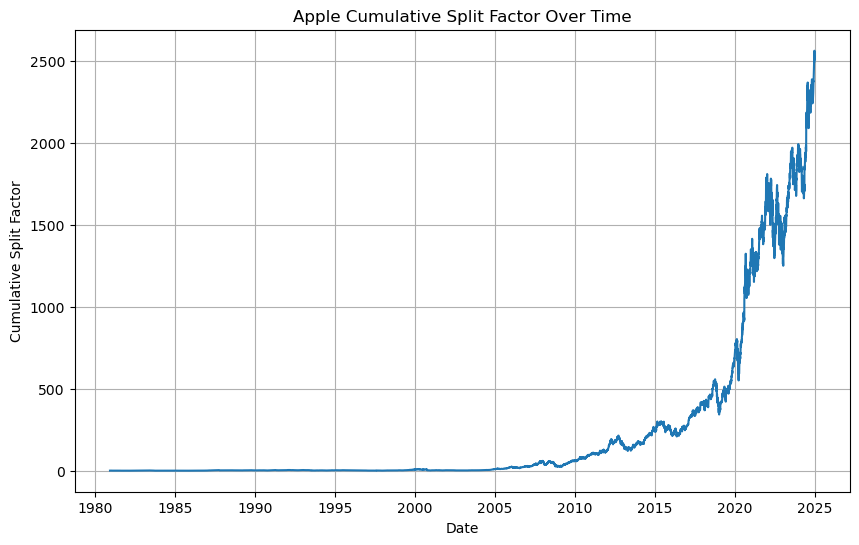

In [49]:
# Visualize the cumulative split factor over time to observe how it has changed
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(appledata['Date'],appledata['Cumulative Split Factor'])
plt.xlabel('Date')
plt.ylabel('Cumulative Split Factor')
plt.title('Apple Cumulative Split Factor Over Time')
plt.grid(True)
plt.show()

In [50]:
# Povides a more accurate representation of historical price changes by incorporating adjustments like stock splits 
# Allowing for meaningful comparisons of stock prices over time even when these events occur

# New column: 'Adjusted Close'
# Start by copying the Close prices
appledata['Adjusted Close'] = appledata['Closing_Price']

# Example: Applying a stock split adjustment
# Where the stock split date and ratio is known
split_date = ['2000-09-29  ']  #  date of stock split
split_ratio = [ 0.481308 ]  # split ratio

for date, ratio in zip(split_date, split_ratio):
    appledata.loc[appledata['Date'] < date, 'Adjusted Close'] /= ratio

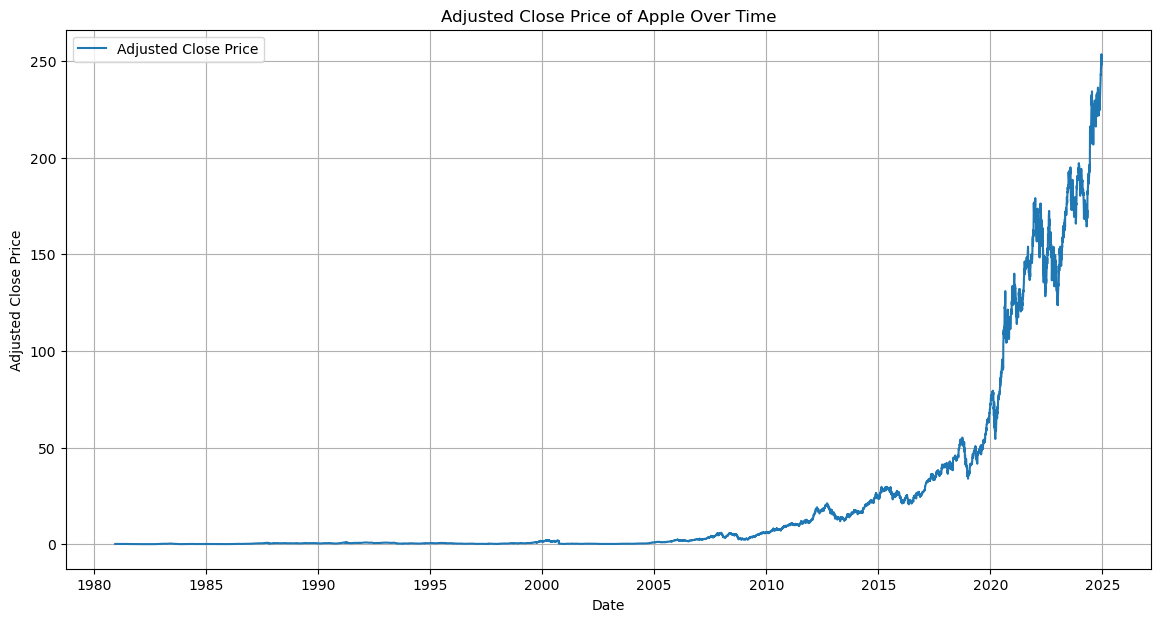

In [51]:
if 'Date' in appledata.columns:
    appledata.set_index('Date', inplace=True)

# Plot the Adjusted Close prices, check if column name is 'Adj Close' or 'Adjusted Close'
plt.figure(figsize=(14, 7))

# Try plotting with 'Adjusted Close' first
if 'Adjusted Close' in appledata.columns:
    plt.plot(appledata['Adjusted Close'], label='Adjusted Close Price')
else:
    # If 'Adjusted Close' is not found, try 'Adj Close'
    plt.plot(appledata['Adj Close'], label='Adjusted Close Price')

plt.title('Adjusted Close Price of Apple Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [52]:
print(appledata.head())

                 Price  Closing_Price           High_Price  \
Date                                                         
NaT             Ticker            NaN                 AAPL   
NaT               Date            NaN                  NaN   
1980-12-12  1980-12-12       0.098834  0.09926417611964887   
1980-12-15  1980-12-15       0.093678   0.0941078974033573   
1980-12-16  1980-12-16       0.086802   0.0872321309177717   

                      Low_Price        Opening_Price     Volume  Prev Close  \
Date                                                                          
NaT                        AAPL                 AAPL       AAPL         NaN   
NaT                         NaN                  NaN        NaN         NaN   
1980-12-12  0.09883448481559753  0.09883448481559753  469033600         NaN   
1980-12-15  0.09367820620536804   0.0941078974033573  175884800    0.098834   
1980-12-16  0.08680244535207748   0.0872321309177717  105728000    0.093678   

           

In [53]:
appledata.head()

,Price,Closing_Price,High_Price,Low_Price,Opening_Price,Volume,Prev Close,Split Ratio,Split Detected,Cumulative Split Factor,Adjusted Close
Date,,,,,,,,,,,
NaT,Ticker,NaN,AAPL,AAPL,AAPL,AAPL,NaN,NaN,NaN,NaN,NaN
NaT,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-12,1980-12-12,0.098834,0.09926417611964887,0.09883448481559753,0.09883448481559753,469033600,NaN,NaN,NaN,NaN,0.205346
1980-12-15,1980-12-15,0.093678,0.0941078974033573,0.09367820620536804,0.0941078974033573,175884800,0.098834,0.947829,NaN,0.947829,0.194633
1980-12-16,1980-12-16,0.086802,0.0872321309177717,0.08680244535207748,0.0872321309177717,105728000,0.093678,0.926602,NaN,0.878261,0.180347


## 2.7-Fix Casing or Inconsistent Values
* Completed via Z-scores
* Completed via IQR

Z-Scores

In [56]:
from scipy.stats import zscore
# Calculate z-scores for each column
appledata_zscores = appledata.select_dtypes(include=[float, int])  # Select only numerical columns
z_scores = appledata_zscores.apply(zscore)
#|Combine with non-numeric data for a complete DataFrame
appledata_final = pd.concat([appledata.select_dtypes(exclude=[float, int]), z_scores], axis=1)
print(appledata_final.head())

                 Price           High_Price            Low_Price  \
Date                                                               
NaT             Ticker                 AAPL                 AAPL   
NaT               Date                  NaN                  NaN   
1980-12-12  1980-12-12  0.09926417611964887  0.09883448481559753   
1980-12-15  1980-12-15   0.0941078974033573  0.09367820620536804   
1980-12-16  1980-12-16   0.0872321309177717  0.08680244535207748   

                  Opening_Price     Volume  Closing_Price  Prev Close  \
Date                                                                    
NaT                        AAPL       AAPL            NaN         NaN   
NaT                         NaN        NaN            NaN         NaN   
1980-12-12  0.09883448481559753  469033600            NaN         NaN   
1980-12-15   0.0941078974033573  175884800            NaN         NaN   
1980-12-16   0.0872321309177717  105728000            NaN         NaN   

           

Observed, no outliers were detected...

IQR

In [59]:
iqr_values = {}

for column in appledata.select_dtypes(include='number').columns:
    Q1 = appledata[column].quantile(0.25)
    Q3 = appledata[column].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[column] = IQR
    print(f"The IQR for {column} is {IQR}")

The IQR for Closing_Price is 17.9420040845871
The IQR for Prev Close is 17.923267424106598
The IQR for Split Ratio is 0.026982168293459674
The IQR for Split Detected is 0.0
The IQR for Cumulative Split Factor is 181.59855442830624
The IQR for Adjusted Close is 17.8066503667094


The Closing_Price, Prev Close, and Adjusted Close are all close to one another comperitavly. 
As well as the Spliit ration adn Split detected. 
There were no outliers detected. 

## 2.8-Conduct Fuzzy Matching
Please note, Fuzzy Matching is unapplicable to my dataset as my data is strictly numerical. 
Nearest Neighbor or Clustering is more appropriate here. 
Likewise, I will be performing Clustering.

In [62]:
# First, Calculate the Daily returns 
# Observe the percentage change in the stock price from one day to the next. 
# Calculated by taking the difference of the day's closing price and previous days closing price. 
# To then, divide by previous day's closing price. 
# Observes how much a stock price increased or decreased on a daily bases. 

from sklearn.preprocessing import StandardScaler
# Calculate daily returns
appledata['Daily Return'] = appledata['Closing_Price'].pct_change().fillna(0)

# Before applying StandardScaler, ensure features are numeric:
features = appledata[['Daily Return', 'Volume']].apply(pd.to_numeric, errors='coerce') 
features = features.fillna(features.mean())  
# Now proceed with scaling:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(features)

In [63]:
appledata.head()

,Price,Closing_Price,High_Price,Low_Price,Opening_Price,Volume,Prev Close,Split Ratio,Split Detected,Cumulative Split Factor,Adjusted Close,Daily Return
Date,,,,,,,,,,,,
NaT,Ticker,NaN,AAPL,AAPL,AAPL,AAPL,NaN,NaN,NaN,NaN,NaN,0.000000
NaT,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
1980-12-12,1980-12-12,0.098834,0.09926417611964887,0.09883448481559753,0.09883448481559753,469033600,NaN,NaN,NaN,NaN,0.205346,0.000000
1980-12-15,1980-12-15,0.093678,0.0941078974033573,0.09367820620536804,0.0941078974033573,175884800,0.098834,0.947829,NaN,0.947829,0.194633,-0.052171
1980-12-16,1980-12-16,0.086802,0.0872321309177717,0.08680244535207748,0.0872321309177717,105728000,0.093678,0.926602,NaN,0.878261,0.180347,-0.073398


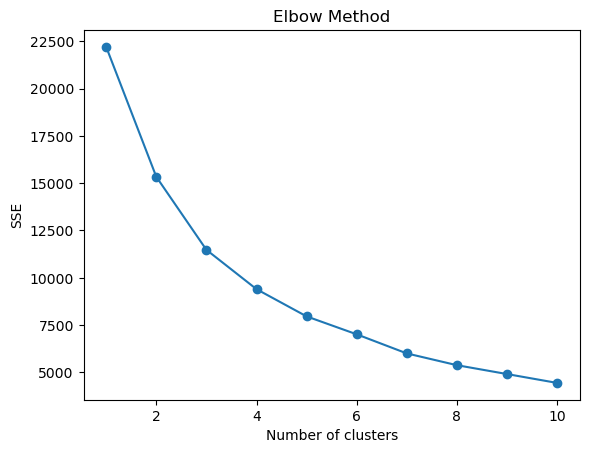

In [64]:
# Apply K-Means Clustering:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the elbow method to decide the number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    sse.append(kmeans.inertia_)

# Plot the elbow
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Let's assume we choose k=3 based on the elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(normalized_data)  # Fit the model to your data
appledata['Cluster'] = kmeans.labels_

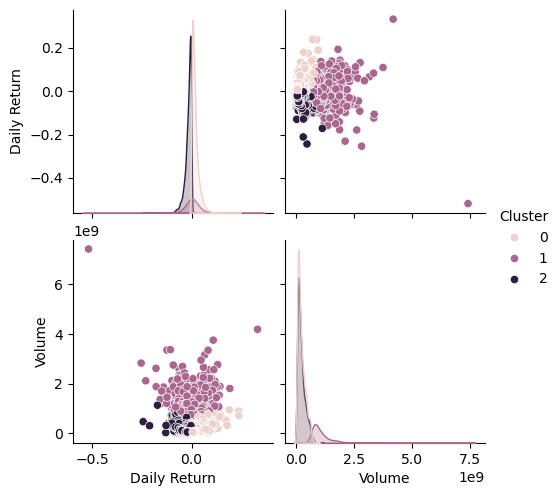

In [65]:
# Analyze the clusters:
import seaborn as sns

# Ensure 'Daily Return' and 'Volume' are numeric
appledata['Daily Return'] = pd.to_numeric(appledata['Daily Return'], errors='coerce')
appledata['Volume'] = pd.to_numeric(appledata['Volume'], errors='coerce')

# If there are still non-numeric values, you might need to handle them
# For example, by replacing them with the mean or median:
appledata['Daily Return'] = appledata['Daily Return'].fillna(appledata['Daily Return'].mean())
appledata['Volume'] = appledata['Volume'].fillna(appledata['Volume'].mean())

# Now try the pairplot again:
sns.pairplot(appledata, hue='Cluster', vars=['Daily Return', 'Volume'])
plt.show()

# 3.-Cleaning/Formatting API data

## 3.1-Instructions
### Perform at least 5 data transformation and/or cleansing steps to your API data.


## 3.2 STEPS to Accomplish Cleaning/Formatting API Data

##### When working with API data from AlphaVantage, specifically the montly adjusted stock prices, several data quality and formatting issues arise that require transformation and cleaning. 
1. Data Format and Structure:
* AlphaVantage's data when retrieved with output_format='json', is returned as a tuple. Where the first element of the tuple is a dictionary containing time series data, and the second element is metadata. Pandas cannot be accessable for data manipulation on this tuple.
###### Extract the time series data from the dictionary and convert it into a Pandas DataFrame. 
* Accomplished using pd.DataFrame.from_dict(data[0], orient="index". Orient="index" is crucial as the dates are the keys in the dictionary.
2. Data Types:
* The values within the DataFrame are initially strings, although represent numerical data. Calculations cannot be performed directly on strings.
###### Convertion of the releveant columns into numerical types, either float or int. are necessary. Using pd.to_numeric(), where the errors='coerce argument is helpful to handle any non-numerical data types by setting them to NaN, which can be further manipulated later on. 
3. Index as Dates:
* The DataFrame's index is initially strings representing dates.
###### Convert the index to datetime objects using pd.to_datetime(). This is essential for timeseries analysis and permits time-based indexing and functions. 
4. Date Order:
* The data is in reverse chronilogical order, assumably.
###### Sort the DataFrame by the date index using df.sort_index()
5. Missing Values:
* While less common with monthly data, there is a possibility of missing values. Due to something like trading halts. Appering as NaN after numeric conversion.
###### Identify via use of df.isnull().sum() to check for the missing values. 
###### For timeseries data, forward fill, df.ffill() is appropriate. However, interpolation is also considered if the data suggests a trend. 
6. Column Names:
* The column anmes are a bit cumbersome.
###### Rename the columns to become more user friendly via df.rename(columns={...}. 
7. Outliers:
* Financial data possibly contains outliers due to unusual marketing events or errors. It may not occur on monthly data, however makes good practice.
###### Identify any outliers, by simply visualizing the data via box plot, while implementing a statistical method like IQR. 
###### Handeling for monthy data, extreme outliers are less likely to be an issue... ... I may consider Capping, Winsorizing or LogTransformation.
8. Data Transformation/ Creating New Features:
###### Calculate additional metrics from the raw data like percentage change, monthly range, and a moving average.
* Utalize Pandas to create new columns:
###### df['Monthly_Return'] = df['5. adjusted close'].pct_change(), calculates the percentage change, 
###### df['Monthly_Range'] = df['High'] - df['Low'] calculates the difference between the "High" and "Low" prices for each month and stores it in a new column called "Monthly_Range", 
##### df['MA_3 or 6 or 12'] = df['Close'].rolling(window=3).mean() calculates the moving average on the Closing column to : 
* Smooths out  price fluctuations and clearity for spotting an underlying trend,
* Helps to filter out this noise, giving a clearer picture of the overall price direction,
* NOTE: not suitable for ALL data. Moving averages are most effective for data that exhibits some degree of trending behavior.

## 3.3-Cleaning and Formatting with API Data

In [71]:
# import libraries, API key, and load the dataset. 
import json
from alpha_vantage.timeseries import TimeSeries
API_key = 'KMX7FFHODSLGIIKX'
ts = TimeSeries(key = API_key,output_format='json')
data=ts.get_monthly_adjusted('AAPL')
time_series_data = data[0] 

In [72]:
if data is not None:
    time_series_data = data[0]
    APIaapl = pd.DataFrame.from_dict(time_series_data, orient='index')

    APIaapl.index = pd.to_datetime(APIaapl.index)
    APIaapl = APIaapl.sort_index()

    APIaapl = APIaapl.rename(columns={
        "1. open": "Open", "2. high": "High", "3. low": "Low",
        "4. close": "Close", "5. adjusted close": "Adj_Close", "6. volume": "Volume", "7. dividend amount": "Dividend_Amount"
    })

    for col in ["Open", "High", "Low", "Close", "Adj_Close", "Volume"]:
        if col in APIaapl.columns:
            APIaapl[col] = pd.to_numeric(APIaapl[col], errors='coerce')  # Use the correct variable name: APIaapl

    APIaapl = APIaapl.ffill()

    APIaapl['Monthly_Return'] = APIaapl['Adj_Close'].pct_change()
    APIaapl['Monthly_Range'] = APIaapl['High'] - APIaapl['Low']

    print(APIaapl.head())

              Open    High     Low   Close  Adj_Close     Volume  \
1999-12-31  101.00  118.00   91.06  102.81     0.7734   84091200   
2000-01-31  104.87  121.50   86.50  103.75     0.7805  112099800   
2000-02-29  104.00  119.94   97.00  114.62     0.8623   65355200   
2000-03-31  118.56  150.38  114.00  135.81     1.0217   77663900   
2000-04-28  135.50  139.50  104.87  124.06     0.9333   77342900   

           Dividend_Amount  Monthly_Return  Monthly_Range  
1999-12-31          0.0000             NaN          26.94  
2000-01-31          0.0000        0.009180          35.00  
2000-02-29          0.0000        0.104805          22.94  
2000-03-31          0.0000        0.184854          36.38  
2000-04-28          0.0000       -0.086522          34.63  


## 3.4-Identification of Outliers and BoxPlot

Outliers in Volume:
               Open     High      Low   Close  Adj_Close      Volume  \
2020-09-30  132.760  137.980  103.100  115.81   112.9296  3886793083   
2020-10-30  117.640  125.390  107.720  108.86   106.1525  2895317580   
2020-11-30  109.110  121.990  107.320  119.05   116.2896  2122724412   
2020-12-31  121.010  138.789  120.010  132.69   129.6133  2319687808   
2021-01-29  133.520  145.090  126.382  131.96   128.9002  2239366098   
2021-03-31  123.750  128.720  116.210  122.15   119.4965  2650845211   
2021-04-30  123.660  137.070  122.490  131.46   128.6043  1889956694   
2021-07-30  136.600  150.000  135.760  145.86   142.9326  1916751489   
2021-12-31  167.480  182.130  157.800  177.57   174.5215  2443227128   
2022-01-31  177.830  182.940  154.700  174.78   171.7794  2106513962   
2022-03-31  164.695  179.610  150.100  174.61   171.8314  2171827429   
2022-05-31  156.710  166.480  132.610  148.84   146.6856  2400305601   
2022-09-30  156.640  164.260  138.000  138.2

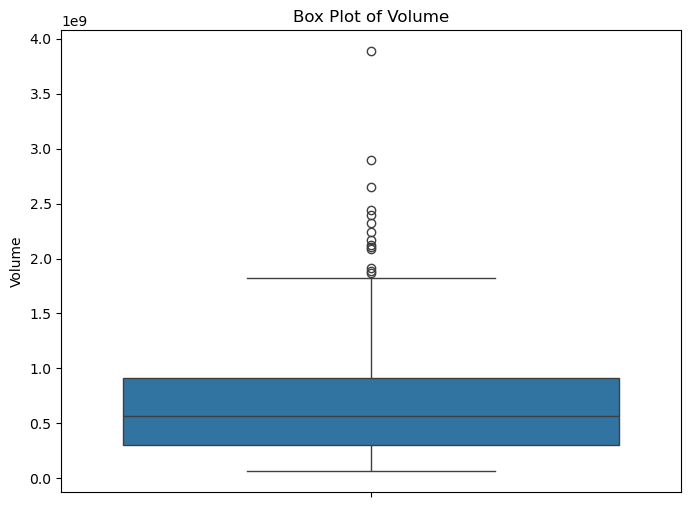

In [74]:
# Identify any outliers, by simply visualizing the data via box plot, while implementing a statistical method like IQR: 

# Imports necessary libaries for plotting
import matplotlib.pyplot as plt
import seaborn as sns # Creates a more visually applealing box plot.

def plot_volume_boxplot(APIaapl): # Defines a functionto encapsulate the plotting and outlier detection logic.
    """
    Generates a box plot of the 'Volume' column and identifies outliers.

    Args:
        df: Pandas DataFrame containing the 'Volume' column.
    """

# Calculate the IQR to identify outliers:
Q1 = APIaapl['Volume'].quantile(0.25) # Calculates the first quartile(Q1) of the 'Volume' data.
Q3 = APIaapl['Volume'].quantile(0.75) # Calculates the third quartile(Q3) of the 'Volume' data.
IQR = Q3 - Q1 # Calculates the Interquartile Range.

# Define outliers: 
outliers = APIaapl[(APIaapl['Volume'] < (Q1 - 1.5 * IQR)) | (APIaapl['Volume'] > (Q3 + 1.5 * IQR))] 
# Identifies outliers as values that are below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

# Print outliers: 
print("Outliers in Volume:")
print(outliers) # Prints the outliers to the console.

# Create the box plot using Seaborn (nicer looking): 
plt.figure(figsize=(8, 6))  # Creates a Matplotlib figure and sets its size
sns.boxplot(y=APIaapl['Volume']) # Creates a boxplot using Seaborn
plt.title('Box Plot of Volume') # Adds a title
plt.ylabel('Volume') # Adds a y-axis label
plt.show() # Displays the plot

## 3.5-Handling Extreme Outliers

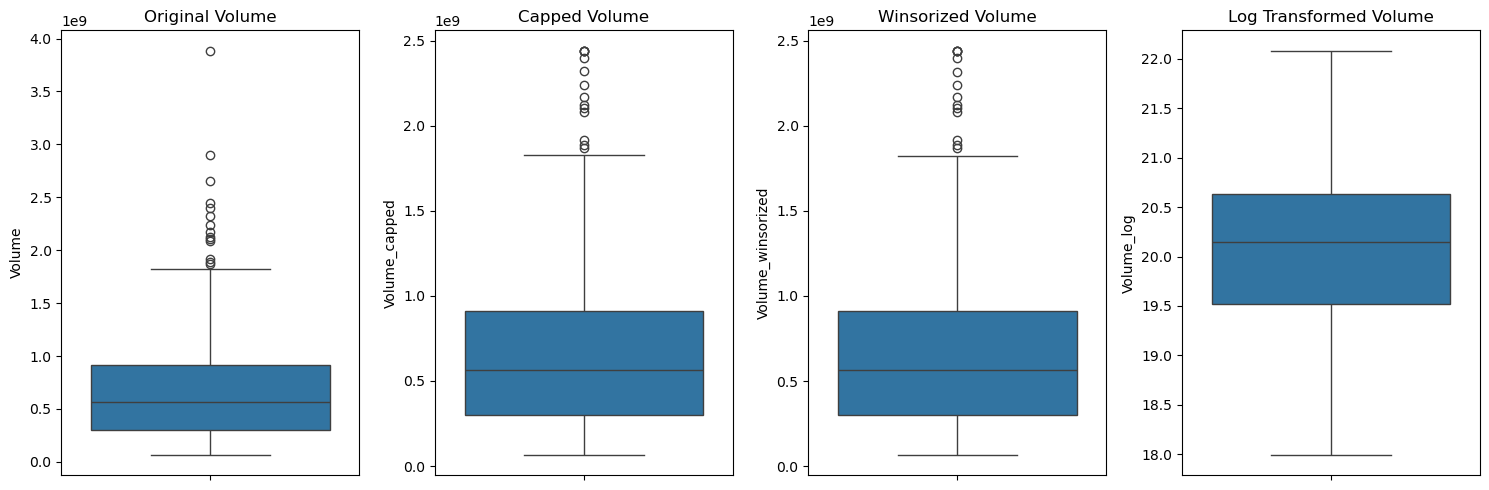

In [76]:
# Handling Extreme Outliers: 
# Imports necessary libraries
import numpy as np # Used for numerical operations. 
from scipy.stats.mstats import winsorize # Used for wunsorizing.

winsorized_volume = winsorize(APIaapl['Volume'], limits=[0, 0.01])  # Winsorizes the 'Volume' column where only the top 1% of the data is winsorized.
# Values above the 99th percentile are replaced with the 99th percentile value.
# The lower limit is ZERO, no winsorizing at the bottom.
APIaapl['Volume_winsorized'] = winsorized_volume # Adds the winsorized volume data as a new column to the DataFrame. 

# --- Define Volume_capped ---
# Here's an example of how to create it using a cap at the 99th percentile: 
volume_cap = APIaapl['Volume'].quantile(0.99) #  Calculates the 99th percentile of the 'Volume' data.
APIaapl['Volume_capped'] = np.where(APIaapl['Volume'] > volume_cap, volume_cap, APIaapl['Volume']) # Caps the 'Volume' data at the 99th percentile.  
# Values above the cap are replaced with the cap value.

# --- Define Volume_log ---
# Assuming 'Volume_log' is a log-transformed version of 'Volume': 
APIaapl['Volume_log'] = np.log1p(APIaapl['Volume'])  # Applies a logarithmic transformation to the 'Volume' data. 
# ...1p... is used instead of np.log() to handle possible zero values. 

# --- Plotting to visualize the effects of each transformation ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y=APIaapl['Volume'])
plt.title('Original Volume')

plt.subplot(1, 4, 2)
sns.boxplot(y=APIaapl['Volume_capped'])
plt.title('Capped Volume')

plt.subplot(1, 4, 3)
sns.boxplot(y=APIaapl['Volume_winsorized'])
plt.title('Winsorized Volume')

plt.subplot(1, 4, 4)
sns.boxplot(y=APIaapl['Volume_log'])
plt.title('Log Transformed Volume')

plt.tight_layout()
plt.show()

## 3.6-Moving Averages Addition

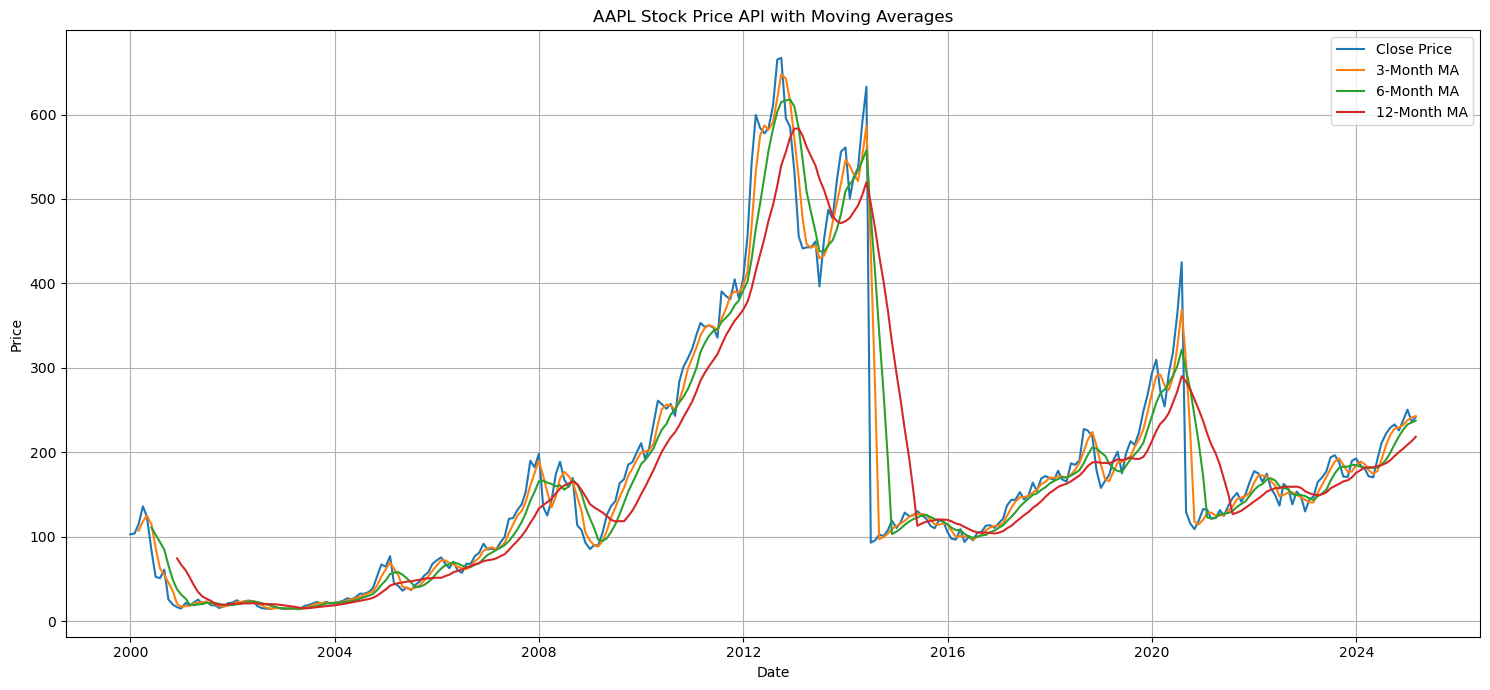


Importance of Moving Averages:
- **Trend Identification:** Moving averages smooth out short-term fluctuations and make it easier to identify underlying trends in the data.  A rising moving average suggests an upward trend, while a falling moving average indicates a downward trend.
- **Noise Reduction:** Financial time series data is often noisy, with lots of small, random price movements. Moving averages help to filter out this noise, giving a clearer picture of the overall price direction.

**Limitations of Moving Averages:**
- **Not Suitable for All Data:**  Moving averages are most effective for data that exhibits some degree of trending behavior.


In [78]:
# Calculate additional metrics from the raw data like

# Calculate Moving Averages
APIaapl['MA_3'] = APIaapl['Close'].rolling(window=3).mean()  # Calculates 3-month moving average of the 'Close' price.
APIaapl['MA_6'] = APIaapl['Close'].rolling(window=6).mean()  # Calculates 6-month moving average of the 'Close' price.
APIaapl['MA_12'] = APIaapl['Close'].rolling(window=12).mean() # Calculates 12-month moving average of the 'Close' price.

# --- Plotting to visualize the moving averages ---
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
plt.plot(APIaapl['Close'], label='Close Price')
plt.plot(APIaapl['MA_3'], label='3-Month MA')
plt.plot(APIaapl['MA_6'], label='6-Month MA')
plt.plot(APIaapl['MA_12'], label='12-Month MA')

plt.title('AAPL Stock Price API with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.tight_layout()
plt.show()

# --- Importance of Moving Averages ---
print("\nImportance of Moving Averages:")
print("- **Trend Identification:** Moving averages smooth out short-term fluctuations and make it easier to identify underlying trends in the data.  A rising moving average suggests an upward trend, while a falling moving average indicates a downward trend.")
print("- **Noise Reduction:** Financial time series data is often noisy, with lots of small, random price movements. Moving averages help to filter out this noise, giving a clearer picture of the overall price direction.")
print("\n**Limitations of Moving Averages:**")
print("- **Not Suitable for All Data:**  Moving averages are most effective for data that exhibits some degree of trending behavior.")

## 3.7-Outcome for Cleaning/Formatting API Data

In [80]:
APIaapl.head()

,Open,High,Low,Close,Adj_Close,Volume,Dividend_Amount,Monthly_Return,Monthly_Range,Volume_winsorized,Volume_capped,Volume_log,MA_3,MA_6,MA_12
1999-12-31,101.00,118.00,91.06,102.81,0.7734,84091200,0.0000,NaN,26.94,84091200,84091200.0,18.247412,NaN,NaN,NaN
2000-01-31,104.87,121.50,86.50,103.75,0.7805,112099800,0.0000,0.009180,35.00,112099800,112099800.0,18.534900,NaN,NaN,NaN
2000-02-29,104.00,119.94,97.00,114.62,0.8623,65355200,0.0000,0.104805,22.94,65355200,65355200.0,17.995348,107.06,NaN,NaN
2000-03-31,118.56,150.38,114.00,135.81,1.0217,77663900,0.0000,0.184854,36.38,77663900,77663900.0,18.167901,118.06,NaN,NaN
2000-04-28,135.50,139.50,104.87,124.06,0.9333,77342900,0.0000,-0.086522,34.63,77342900,77342900.0,18.163759,124.83,NaN,NaN


# 4.-Cleaning/Formatting Website Data

## 4.1-Intrstuctions: 

Perform at least 5 data transformation and/or cleansing steps to your website data.

## 4.2-STEPS to Accomplish Cleaning/Formatting Website Data

This code uses Selenium to automate a Chrome browser, navigate to the Yahoo Finance quote page for Apple (AAPL), scrape specific real-time stock data, and store it in a Pandas DataFrame. 

1. Import Libraries:

selenium: For web browser automation.
webdriver: To control the browser.
By: To locate elements on the web page.
WebDriverWait: To wait for elements to load.
expected_conditions as EC: To define conditions to wait for.
chrome.service.Service: To manage the ChromeDriver service.
chrome.options.Options: To configure Chrome browser options.
selenium.common.exceptions: for specific selenium related exceptions.
webdriver_manager.chrome.ChromeDriverManager: To automatically download and manage the ChromeDriver.
pandas as pd: For data manipulation and creating DataFrames.
time: For time-related functions (though not explicitly used in this snippet).
logging: For logging errors and debugging.

2. Configure Logging:

logging.basicConfig(...): Sets up basic logging to record errors.
level=logging.ERROR: Logs only error messages.
format='%(asctime)s - %(levelname)s - %(message)s': Defines the format of log messages.

3. Set Up WebDriver:

try...except...finally: Encloses the WebDriver setup and scraping logic to handle potential errors.
service = Service(ChromeDriverManager().install()): Downloads and installs the appropriate ChromeDriver using webdriver_manager.
options = Options(): Creates Chrome browser options.
options.add_argument("user-agent=..."): Sets the user-agent header to mimic a regular browser, potentially avoiding bot detection.
options.add_argument("--headless=new"): Runs Chrome in headless mode (without a visible window).
driver = webdriver.Chrome(service=service, options=options): Initializes the Chrome WebDriver.

4. Navigate to Yahoo Finance:

url = "https://finance.yahoo.com/quote/AAPL?p=AAPL": Sets the URL to the Yahoo Finance AAPL quote page.
driver.get(url): Opens the URL in the Chrome browser.

5. Scrape Data:

try...except selenium.common.exceptions.TimeoutException...except Exception as e: Another try-except block to handle scraping errors.
price_element = WebDriverWait(driver, 30).until(...): Waits up to 30 seconds for the current price element to become visible.
EC.visibility_of_element_located(...): Checks if the element is visible.
By.XPATH, '//fin-streamer[@data-field="regularMarketPrice"]': Locates the price element using its XPath.
price = price_element.text: Extracts the text (price) from the element.
The code then performs similar steps to extract:
Previous close (previous_close_element, previous_close).
Open price (open_element, open_price).
Bid price (bid_element, bid_price).
Ask price (ask_element, ask_price).
Day range (day_range_element, day_range).
Volume (volume_element, volume).
data = {...}: Creates a dictionary to store the scraped data.
yf_df = pd.DataFrame(data): Creates a Pandas DataFrame from the dictionary.
print(yf_df): Prints the DataFrame.

6. Error Handling:

except selenium.common.exceptions.TimeoutException: Catches timeout exceptions (if an element doesn't load in time).
logging.error(...): Logs the timeout error.
driver.save_screenshot("timeout_screenshot.png"): Saves a screenshot of the page.
yf_df = pd.DataFrame(): Creates an empty DataFrame.
except Exception as e: Catches other exceptions during scraping.
logging.error(...): Logs the error.
yf_df = pd.DataFrame(): Creates an empty DataFrame.

7. Close WebDriver:

finally: Ensures the WebDriver is closed, even if errors occur.
driver.quit(): Closes the browser.
except Exception as e: Catches errors during WebDriver closure.
logging.error(...): Logs the error.

8. Post-Scraping Data Handling:

if 'yf_df' in locals() and not yf_df.empty: Checks if the DataFrame was created and is not empty.
print(yf_df.dtypes): Prints the data types of the DataFrame columns.
elif 'yf_df' in locals() and yf_df.empty: Checks if the DataFrame was created but is empty.
print('Dataframe was not created.'): Prints a message.
In essence, this script automates a browser to scrape real-time stock data from Yahoo Finance, handles potential errors, and stores the data in a DataFrame.


Although I was still unable to get the code to deploy (but one or two times...) maybe yahoo fiance believes I am an entity or bot entity at this point... :) 

## 4.3-Data Aquisition with yfinance
* Aquire the Apple historical data from yahoo finance website via yahoo finance webpage:
  NOTE: This webpage is in JAVA format:
  * I will be using seleium to scrape the data

In [87]:
!pip install webdriver-manager

In [140]:
!pip install --upgrade webdriver-manager

In [142]:
import selenium
selenium.__version__

'4.29.0'

In [182]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
import logging
import selenium.common.exceptions
from selenium.webdriver.chrome.options import Options

# Configure logging
logging.basicConfig(level=logging.ERROR, format='%(asctime)s - %(levelname)s - %(message)s')

try:
    service = Service(ChromeDriverManager().install())
    options = Options()
    options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36")
    options.add_argument("--headless=new")
    driver = webdriver.Chrome(service=service, options=options)

    url = "https://finance.yahoo.com/quote/AAPL?p=AAPL"  # Quote page URL
    driver.get(url)

    try:
        # Wait for the summary data to load (example: price)
        price_element = WebDriverWait(driver, 30).until(
            EC.visibility_of_element_located((By.XPATH, '//fin-streamer[@data-field="regularMarketPrice"]'))
        )
        price = price_element.text

        # Get other key data points (adjust XPaths as needed)
        previous_close_element = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.XPATH, '//td[@data-test="PREV_CLOSE-value"]'))
        )
        previous_close = previous_close_element.text

        open_element = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.XPATH, '//td[@data-test="OPEN-value"]'))
        )
        open_price = open_element.text

        bid_element = WebDriverWait(driver,10).until(
            EC.visibility_of_element_located((By.XPATH, '//td[@data-test="BID-value"]'))
        )
        bid_price = bid_element.text

        ask_element = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.XPATH, '//td[@data-test="ASK-value"]'))
        )
        ask_price = ask_element.text

        day_range_element = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.XPATH, '//td[@data-test="DAYS_RANGE-value"]'))
        )
        day_range = day_range_element.text

        volume_element = WebDriverWait(driver, 10).until(
            EC.visibility_of_element_located((By.XPATH, '//td[@data-test="TD_VOLUME-value"]'))
        )
        volume = volume_element.text

        # Create a DataFrame
        data = {
            "Price": [price],
            "Previous Close": [previous_close],
            "Open": [open_price],
            "Bid": [bid_price],
            "Ask": [ask_price],
            "Day Range": [day_range],
            "Volume": [volume]
        }
        yf_df = pd.DataFrame(data)
        print(yf_df)

    except selenium.common.exceptions.TimeoutException:
        logging.error("Timeout waiting for element to load.")
        driver.save_screenshot("timeout_screenshot.png")
        yf_df = pd.DataFrame()
    except Exception as e:
        logging.error(f"Error during scraping: {e}")
        yf_df = pd.DataFrame()

finally:
    try:
        driver.quit()
    except Exception as e:
        logging.error(f"Error closing the driver: {e}")

if 'yf_df' in locals() and not yf_df.empty:
    print(yf_df.dtypes)
elif 'yf_df' in locals() and yf_df.empty:
    print('Dataframe was not created.')

2025-03-01 21:40:27,010 - ERROR - Timeout waiting for element to load.


Dataframe was not created.


# 5-Instructions:

Merging the Data and Storing in a Database/Visualizing Data
Now that you have cleaned and transformed your 3 datasets, you need to load each transformed dataset into a database in Python. You can choose the tool, but SQLLite3 is what I would recommend.
Once you have 3 tables in the database you have created, you need to write a query to join the 3 datasets together. Then using this merged dataset, you must create  5 visualizations.
For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI.
PowerBI is a free tool that could be used – Tableau only has a free web author. If your use Tableau/PowerBI you need to submit a PDF with your assignment vs the Tableau/PowerBI file.

### Steps to complete this process: 

This code performs a three-step process: database creation and population, data merging using SQL, and data visualization. 

Step 1: Database Creation and Table Population (SQLite3)
Step 2: Merging Data with SQL Query
Step 3: Visualizations

## 5.1-Database Creation and Table Population

Ccode snippet focuses on loading three Pandas DataFrames (appledata, APIaapl, and yf_df) into an SQLite database named aapl_merged.db, with specific handling for the yf_df DataFrame.

1. Import Libraries:

sqlite3: For interacting with SQLite databases.
pandas as pd: For working with DataFrames.
sqlalchemy: For defining SQL data types, used in the dtype_mapping.
2. Database Connection:

conn = sqlite3.connect('aapl_merged.db'): Establishes a connection to the SQLite database aapl_merged.db. If the database file doesn't exist, it will be created.
3. DataFrame Processing (Specifically yf_df):

yf_df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in yf_df.columns]: This line corrects column names in the yf_df DataFrame. It replaces spaces, hyphens, and periods with underscores to ensure the column names are valid SQLite identifiers. This is important because SQLite has specific rules for naming columns.
dtype_mapping = {...}: A dictionary dtype_mapping is created to explicitly define the data types for the columns in the yf_df DataFrame. This is crucial for ensuring that the data is stored correctly in the SQLite database.
'Date': sqlalchemy.types.DateTime: Specifies that the 'Date' column should be stored as a DATETIME type.
'Open': sqlalchemy.types.Float, 'High': sqlalchemy.types.Float, 'Low': sqlalchemy.types.Float, 'Close': sqlalchemy.types.Float, 'Adj_Close': sqlalchemy.types.Float: Specifies that these columns should be stored as floating-point numbers.
'Volume': sqlalchemy.types.Integer: Specifies that the 'Volume' column should be stored as an integer.
 ... add other columns and types ...: Indicates that you can add more column-type mappings to this dictionary as needed.

4. Loading DataFrames into Tables:

appledata.to_sql('aapldata_table', conn, if_exists='replace', index=False): Loads the appledata DataFrame into a table named aapldata_table in the SQLite database.
if_exists='replace': If the table already exists, it will be replaced.
index=False: The DataFrame's index will not be written to the table.
APIaapl.to_sql('apiaapl_table', conn, if_exists='replace', index=False): Loads the APIaapl DataFrame into a table named apiaapl_table with the same options.
if not yf_df.empty:: Checks if the yf_df DataFrame is empty.
If it's not empty:
yf_df.to_sql('yf_df_table', conn, if_exists='replace', index=False, dtype=dtype_mapping): Loads the yf_df DataFrame into a table named yf_df_table.
dtype=dtype_mapping: Applies the data type mappings defined earlier.
If it's empty:
print("yf_df is empty. Table not created."): Prints a message indicating that the table was not created.

5. Close Connection:

conn.close(): Closes the connection to the SQLite database.

In summary:

This code loads three cleaned DataFrames into an SQLite database. It performs data cleaning on the column names of the yf_df dataframe, and it explicitly defines the datatypes of the columns of the yf_df dataframe to ensure the data is stored correctly in the database. It then loads the dataframes into their own tables. Finally it closes the database connection.

In [235]:
# Step 1 Loading DataFrame into SQLite:

import sqlite3
import pandas as pd
import sqlalchemy

# Assuming appledata, APIaapl, and yf_df are your cleaned DataFrames

# Connect to the database (or create if it doesn't exist)
conn = sqlite3.connect('aapl_merged.db')

# Correct column names in yf_df
yf_df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in yf_df.columns]

# Define data types
dtype_mapping = {
    'Date': sqlalchemy.types.DateTime,
    'Open': sqlalchemy.types.Float,
    'High': sqlalchemy.types.Float,
    'Low': sqlalchemy.types.Float,
    'Close': sqlalchemy.types.Float,
    'Adj_Close': sqlalchemy.types.Float,
    'Volume': sqlalchemy.types.Integer,
    # ... add other columns and types ...
}

# Load DataFrames into tables
appledata.to_sql('aapldata_table', conn, if_exists='replace', index=False)
APIaapl.to_sql('apiaapl_table', conn, if_exists='replace', index=False)

if not yf_df.empty:
    yf_df.to_sql('yf_df_table', conn, if_exists='replace', index=False, dtype=dtype_mapping)
else:
    print("yf_df is empty. Table not created.")

# Close the connection
conn.close()

AttributeError: 'tuple' object has no attribute 'replace'

This code snippet performs the following tasks:

1. Import Libraries:

* pandas as pd: For data manipulation and working with DataFrames.
* yfinance as yf: For downloading financial data from Yahoo Finance.
* sqlite3: For interacting with SQLite databases.
* time: For time-related operations, specifically for adding delays during retries.

2. Define download_with_retry Function:
This function attempts to download stock data from Yahoo Finance using yfinance, with retry logic to handle potential errors.
Parameters:


* ticker: The stock ticker symbol (e.g., "AAPL").
* period: The time period for which to download data (e.g., "5y" for 5 years).
* max_retries: The maximum number of download attempts (default is 3).
* retry_delay: The delay in seconds between retries (default is 5).
  
Logic:

* It enters a for loop that iterates up to max_retries times.
* Inside the loop, it attempts to download data using yf.download(ticker, period=period).
* If the download is successful, it returns the downloaded DataFrame.
* If an exception occurs during the download:
* It prints an error message indicating the attempt number and the exception.
* If it's not the last retry, it waits for retry_delay seconds using time.sleep().
* If it's the last retry, it prints a "Max retries reached" message and returns an empty DataFrame.
* This function adds robustness to the download process, handling potential network issues or temporary API glitches.

4. Database Operations:

Database Connection:

* conn = sqlite3.connect('aapldata'): Establishes a connection to the SQLite database aapldata. If the database file doesn't exist, it will be created.
* cursor = conn.cursor(): Creates a cursor object to execute SQL commands.

Load appledata and APIaapl DataFrames:

* if not appledata.empty:: Checks if the appledata DataFrame is not empty.
* appledata.to_sql("kaggle_table", conn, if_exists="replace", index=False): If not empty, it loads the appledata DataFrame into a table named
* kaggle_table in the database.
* if_exists="replace": If the table already exists, it will be replaced.
* index=False: The DataFrame's index will not be written to the table.
  
The same process is repeated for the APIaapl DataFrame and the alpha_vantage_table.

Download Yahoo Finance Data:

* yf_df = download_with_retry("AAPL", "5y"): Calls the download_with_retry function to download 5 years of AAPL data.
* Load yf_df DataFrame:
* if not yf_df.empty:: Checks if the downloaded yf_df DataFrame is not empty.
* yf_df.to_sql("yahoo_finance_table", conn, if_exists="replace", index=False): If not empty, it loads the yf_df DataFrame into a table named yahoo_finance_table.
* else:: If yf_df is empty, it prints a message indicating that no data was downloaded after retries.

Commit and Close:
* conn.commit(): Commits the changes to the database.
* conn.close(): Closes the database connection.

Overall Functionality:

This code downloads historical stock data for Apple (AAPL) from Yahoo Finance, with retry logic to handle potential errors. It then loads three DataFrames (appledata, APIaapl, and the downloaded yf_df) into an SQLite database. The retry logic is a key part of this code, designed to make the download process more robust

In [204]:
import pandas as pd
import yfinance as yf
import sqlite3
import time

def download_with_retry(ticker, period, max_retries=3, retry_delay=5):
    for attempt in range(max_retries):
        try:
            data = yf.download(ticker, period=period)
            return data
        except Exception as e:
            print(f"Attempt {attempt + 1} failed: {e}")
            if attempt < max_retries - 1:
                time.sleep(retry_delay)
            else:
                print("Max retries reached. Download failed.")
                return pd.DataFrame() #return empty dataframe.

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect('aapldata')
cursor = conn.cursor()

# Create tables and insert data (if DataFrames are not empty)
if not appledata.empty:
    appledata.to_sql("kaggle_table", conn, if_exists="replace", index=False)
if not APIaapl.empty:
    APIaapl.to_sql("alpha_vantage_table", conn, if_exists="replace", index=False)

yf_df = download_with_retry("AAPL", "5y")

if not yf_df.empty:
    yf_df.to_sql("yahoo_finance_table", conn, if_exists="replace", index=False)
else:
    print("No data was downloaded from Yahoo Finance after retries.")

# Commit changes and close connection
conn.commit()
conn.close()

[*********************100%***********************]  1 of 1 completed
2025-03-01 21:48:14,912 - ERROR - 
1 Failed download:
2025-03-01 21:48:14,912 - ERROR - ['AAPL']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


No data was downloaded from Yahoo Finance after retries.


Due to yahoo fianance data... being tedeious and not wanting to re-run after a succuessful attempt... I will proceed with out 

This Python code snippet focuses on loading two Pandas DataFrames, appledata and APIaapl, into an SQLite database named aapldata.

1. Import Libraries:

* pandas as pd: Imports the Pandas library for data manipulation and working with DataFrames.
* sqlite3: Imports the SQLite3 library for interacting with SQLite databases.

2. Database Connection:

* conn = sqlite3.connect('aapldata'): Establishes a connection to the SQLite database file named aapldata. If the file doesn't exist, it will be created.
* cursor = conn.cursor(): Creates a cursor object. The cursor is used to execute SQL commands within the database.

3. DataFrame Loading (Conditional):
if 'appledata' in locals() and not appledata.empty:: This line checks two conditions:
* 'appledata' in locals(): Checks if a variable named appledata exists in the current local scope. This prevents errors if the DataFrame hasn't been defined.
* not appledata.empty: Checks if the appledata DataFrame is not empty.
* appledata.to_sql("kaggle_table", conn, if_exists="replace", index=False): If both conditions are true, this line loads the appledata DataFrame into
* a table named kaggle_table in the aapldata database.

conn: The database connection object.

* if_exists="replace": If a table named kaggle_table already exists, it will be replaced with the data from the DataFrame.
* index=False: The DataFrame's index will not be written to the database table.
* if 'APIaapl' in locals() and not APIaapl.empty:: This block of code performs the exact same operations as the previous block, but for the APIaapl
* DataFrame and the alpha_vantage_table table.

4. Commit and Close:

* conn.commit(): Commits the changes made to the database. This ensures that the data is written to the database file.
* conn.close(): Closes the connection to the SQLite database. It's essential to close the connection to release resources.

5. Confirmation Message:

* print("Database operations completed."): Prints a message to the console indicating that the script has finished its database operations.
  
In summary:

This script loads two Pandas DataFrames, appledata and APIaapl, into an SQLite database. It checks if the DataFrames exist and are not empty before attempting to load them. It then loads the DataFrames into their respective tables, replacing existing tables if necessary. Finally, it commits the changes and closes the database connection, and prints a confirmation message. This code is designed to be robust and prevent errors if the input DataFrames are not available.

In [237]:
import sqlite3
import pandas as pd
import sqlalchemy

# Assuming appledata and APIaapl are your cleaned DataFrames

# Connect to the database (or create if it doesn't exist)
conn = sqlite3.connect('aapl_merged.db')

# Data type definitions (for potential future yf_df table)
dtype_mapping = {
    'Date': sqlalchemy.types.DateTime,
    'Open': sqlalchemy.types.Float,
    'High': sqlalchemy.types.Float,
    'Low': sqlalchemy.types.Float,
    'Close': sqlalchemy.types.Float,
    'Adj_Close': sqlalchemy.types.Float,
    'Volume': sqlalchemy.types.Integer,
}

# Load DataFrames into tables
appledata.to_sql('aapldata_table', conn, if_exists='replace', index=False)
APIaapl.to_sql('apiaapl_table', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

## 5.2-Merging Data with SQL Query

This Python code snippet connects to an SQLite database named aapl_merged.db, retrieves the schema information for the aapldata_table, and prints it to the console.


1. Import sqlite3:

* import sqlite3: Imports the SQLite3 library, which is used to interact with SQLite databases.

2. Establish Database Connection:

* conn = sqlite3.connect('aapl_merged.db'): Creates a connection to the SQLite database file named aapl_merged.db. If the file doesn't exist, it will be created.
* cursor = conn.cursor(): Creates a cursor object. The cursor is used to execute SQL commands within the database.

3. Execute PRAGMA Command:

* cursor.execute("PRAGMA table_info(aapldata_table);"): Executes the PRAGMA table_info(aapldata_table); SQL command.
* PRAGMA table_info(): This is an SQLite pragma (a special command) that retrieves information about a table's structure.
* aapldata_table: Specifies the name of the table for which you want to retrieve information.

4. Fetch Results:

* results = cursor.fetchall(): Fetches all the rows returned by the executed PRAGMA command. The results are stored in the results variable as a list of tuples. Each tuple represents a column in the aapldata_table.

5. Print Results:

* for row in results:: Iterates through the results list, which contains the column information.
* print(row): Prints each row (tuple) to the console. Each tuple contains the following information about a column:
* Column ID
* Column Name
* Data Type
* Whether the column can be NULL
* Default Value
* Whether the column is a primary key

6. Close Connection:

conn.close(): Closes the connection to the SQLite database. It's essential to close the connection to release resources.


This code helps to inspect the structure of  aapldata_table by displaying its column names, data types, and other relevant information. This is useful for debugging or understanding the schema of your database tables.

In [243]:
import sqlite3

conn = sqlite3.connect('aapl_merged.db')
cursor = conn.cursor()

cursor.execute("PRAGMA table_info(aapldata_table);")
results = cursor.fetchall()

for row in results:
    print(row)

conn.close()

(0, 'Price', 'TEXT', 0, None, 0)
(1, 'Closing_Price', 'REAL', 0, None, 0)
(2, 'High_Price', 'TEXT', 0, None, 0)
(3, 'Low_Price', 'TEXT', 0, None, 0)
(4, 'Opening_Price', 'TEXT', 0, None, 0)
(5, 'Volume', 'REAL', 0, None, 0)
(6, 'Prev Close', 'REAL', 0, None, 0)
(7, 'Split Ratio', 'REAL', 0, None, 0)
(8, 'Split Detected', 'REAL', 0, None, 0)
(9, 'Cumulative Split Factor', 'REAL', 0, None, 0)
(10, 'Adjusted Close', 'REAL', 0, None, 0)
(11, 'Daily Return', 'REAL', 0, None, 0)
(12, 'Cluster', 'INTEGER', 0, None, 0)


Code snippet is very similar to the previous one, but it retrieves the schema information for the apiaapl_table instead of the aapldata_table.



1. Import sqlite3:

import sqlite3: Imports the SQLite3 library, which is used to interact with SQLite databases.

2. Establish Database Connection:

conn = sqlite3.connect('aapl_merged.db'): Creates a connection to the SQLite database file named aapl_merged.db. If the file doesn't exist, it will be created.
cursor = conn.cursor(): Creates a cursor object. The cursor is used to execute SQL commands within the database.

3. Execute PRAGMA Command:

cursor.execute("PRAGMA table_info(apiaapl_table);"): Executes the PRAGMA table_info(apiaapl_table); SQL command.
PRAGMA table_info(): This is an SQLite pragma (a special command) that retrieves information about a table's structure.
apiaapl_table: Specifies the name of the table for which you want to retrieve information.

4. Fetch Results:

results = cursor.fetchall(): Fetches all the rows returned by the executed PRAGMA command. The results are stored in the results variable as a list of tuples. Each tuple represents a column in the apiaapl_table.

5. Print Results:

for row in results:: Iterates through the results list, which contains the column information.
print(row): Prints each row (tuple) to the console. Each tuple contains the following information about a column:
Column ID
Column Name
Data Type
Whether the column can be NULL
Default Value
Whether the column is a primary key

6. Close Connection:

conn.close(): Closes the connection to the SQLite database. It's essential to close the connection to release resources.

In summary:

This code snippet is designed to retrieve and display the schema (structure) of the apiaapl_table within the aapl_merged.db SQLite database. It provides information about the table's columns, including their names, data types, and other attributes. This is valuable for understanding the table's design and for debugging purposes.

In [253]:
import sqlite3

conn = sqlite3.connect('aapl_merged.db')
cursor = conn.cursor()

cursor.execute("PRAGMA table_info(apiaapl_table);")
results = cursor.fetchall()

for row in results:
    print(row)

conn.close()

(0, 'Open', 'REAL', 0, None, 0)
(1, 'High', 'REAL', 0, None, 0)
(2, 'Low', 'REAL', 0, None, 0)
(3, 'Close', 'REAL', 0, None, 0)
(4, 'Adj_Close', 'REAL', 0, None, 0)
(5, 'Volume', 'INTEGER', 0, None, 0)
(6, 'Dividend_Amount', 'TEXT', 0, None, 0)
(7, 'Monthly_Return', 'REAL', 0, None, 0)
(8, 'Monthly_Range', 'REAL', 0, None, 0)
(9, 'Volume_winsorized', 'INTEGER', 0, None, 0)
(10, 'Volume_capped', 'REAL', 0, None, 0)
(11, 'Volume_log', 'REAL', 0, None, 0)
(12, 'MA_3', 'REAL', 0, None, 0)
(13, 'MA_6', 'REAL', 0, None, 0)
(14, 'MA_12', 'REAL', 0, None, 0)


This  code performs the following actions:

1. Data Loading to SQLite:

Imports:

* sqlite3: For interacting with SQLite databases.
* pandas as pd: For working with DataFrames.
* sqlalchemy: For defining SQL data types (though not explicitly used in this snippet).
* Database Connection:
* conn = sqlite3.connect('aapl_merged.db'): Establishes a connection to the SQLite database file named aapl_merged.db. If the file doesn't exist, it is created.

DataFrame Loading:
* appledata.to_sql('aapldata_table', conn, if_exists='replace', index=True, index_label='row_num'): Loads the appledata DataFrame into a table named
* aapldata_table.
* index=True: Includes the DataFrame's index as a column.
* index_label='row_num': Names the index column row_num.
* if_exists='replace': If the table already exists, it is replaced.
* APIaapl.to_sql('apiaapl_table', conn, if_exists='replace', index=True, index_label='row_num'): Loads the APIaapl DataFrame into a table named apiaapl_table in the same way.

Close Connection:
conn.close(): Closes the database connection.

2. Data Merging from SQLite:

Database Connection:
* conn = sqlite3.connect('aapl_merged.db'): Re-establishes a connection to the database.
* cursor = conn.cursor(): Creates a cursor object to execute SQL queries.


SQL Query:
* sql_query = "...": Defines an SQL query to join aapldata_table (aliased as a) and apiaapl_table (aliased as api) based on the row_num column (the index).
* The query selects all columns from aapldata_table and specific columns (Open, High, Low, Close, Adj_Close, Volume) from apiaapl_table, renaming them with the api_ prefix.

Execute Query and Create DataFrame:
* cursor.execute(sql_query): Executes the SQL query.
* merged_data = cursor.fetchall(): Fetches the results of the query.
* merged_df = pd.DataFrame(merged_data, columns=[description[0] for description in cursor.description]): Creates a Pandas DataFrame from the fetched data, using the column names from the cursor's description.
* 
Close Connection:
* conn.close(): Closes the database connection.

3. Data Cleaning:

Data Type Conversion:
* numeric_cols = [...]: Defines a list of numeric column names.
* The code iterates through these columns and uses pd.to_numeric() to convert them to numeric data types, handling any parsing errors.


Missing Value Handling:
* merged_df.fillna(method='ffill', inplace=True): Fills missing values in the DataFrame using forward fill (propagates the last valid observation forward).


Print DataFrame Head:
* print(merged_df.head()): Prints the first few rows of the cleaned and merged DataFrame to the console.


In Summary:

The code loads two Pandas DataFrames into an SQLite database, merging them based on their row number (index), and then cleans the resulting merged DataFrame by converting numeric columns and filling missing values. Finally, it prints the first few rows of the merged DataFrame. This code is useful for preparing data from different sources for analysis by combining them into a single DataFrame. 

In [274]:
# Step 2: Merging Data with SQL Query: 

import sqlite3
import pandas as pd
import sqlalchemy

# Assuming appledata and APIaapl are your cleaned DataFrames

# Connect to the database (or create if it doesn't exist)
conn = sqlite3.connect('aapl_merged.db')

# Load DataFrames into tables with index as a column
appledata.to_sql('aapldata_table', conn, if_exists='replace', index=True, index_label='row_num')
APIaapl.to_sql('apiaapl_table', conn, if_exists='replace', index=True, index_label='row_num')

# Close the connection
conn.close()

# Connect to the database
conn = sqlite3.connect('aapl_merged.db')
cursor = conn.cursor()

# SQL query to join the tables based on row number
sql_query = """
SELECT a.*,
        api.Open AS api_Open, api.High AS api_High, api.Low AS api_Low, api.Close AS api_Close, api.Adj_Close AS api_Adj_Close, api.Volume AS api_Volume
FROM aapldata_table a
LEFT JOIN apiaapl_table api ON a.row_num = api.row_num;
"""

# Execute the query and fetch data
cursor.execute(sql_query)
merged_data = cursor.fetchall()
merged_df = pd.DataFrame(merged_data, columns=[description[0] for description in cursor.description])

# Close the connection
conn.close()

# Data Cleaning after the merge (if needed)
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'api_Open', 'api_High', 'api_Low', 'api_Close', 'api_Adj_Close', 'api_Volume']
for col in numeric_cols:
    if col in merged_df.columns:
        merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
merged_df.fillna(method='ffill', inplace=True)

print(merged_df.head())

               row_num  Closing_Price           High_Price  \
0                 None            NaN                 AAPL   
1                 None            NaN                 AAPL   
2  1980-12-12 00:00:00       0.098834  0.09926417611964887   
3  1980-12-15 00:00:00       0.093678   0.0941078974033573   
4  1980-12-16 00:00:00       0.086802   0.0872321309177717   

             Low_Price        Opening_Price        Volume  Prev Close  \
0                 AAPL                 AAPL  3.156514e+08         NaN   
1                 AAPL                 AAPL  3.156514e+08         NaN   
2  0.09883448481559753  0.09883448481559753  4.690336e+08         NaN   
3  0.09367820620536804   0.0941078974033573  1.758848e+08    0.098834   
4  0.08680244535207748   0.0872321309177717  1.057280e+08    0.093678   

   Split Ratio  Split Detected  Cumulative Split Factor  Adjusted Close  \
0          NaN             NaN                      NaN             NaN   
1          NaN             NaN        

C:\Users\ashem\AppData\Local\Temp\ipykernel_7584\452851479.py:44: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


## 5.3-Visualization

In [277]:
# To view the dataframe column names only to assist with visualization purposes: 
print(merged_df.columns)

Index(['row_num', 'Closing_Price', 'High_Price', 'Low_Price', 'Opening_Price',
       'Volume', 'Prev Close', 'Split Ratio', 'Split Detected',
       'Cumulative Split Factor', 'Adjusted Close', 'Daily Return', 'Cluster',
       'Date', 'api_Open', 'api_High', 'api_Low', 'api_Close', 'api_Adj_Close',
       'api_Volume'],
      dtype='object')


This code snippet generates five different visualizations using the matplotlib and seaborn libraries, based on a Pandas DataFrame named merged_df. 

#### Prerequisites:

It assumes that the merged_df DataFrame exists and contains the following columns (or similar):
* Volume (from aapldata)
* api_Volume (from APIaapl)
* Closing_Price (from aapldata)
* api_Close (from APIaapl)
* Opening_Price (from aapldata)
* api_Open (from APIaapl)

1. Scatter Plot: Volume Comparision

* Purpose: This plot visualizes the relationship between the trading volumes from the aapldata and APIaapl datasets.
* Relationship: It shows if there's a correlation or pattern between the volumes. If points form a diagonal line, it suggests a strong positive correlation. If they're scattered randomly, there's little to no correlation.
* alpha=0.5: Makes the points semi-transparent, useful for handling overlapping points.

2. Line Plot: Closing Price Comparision

* Purpose: Compares the closing prices from the two datasets over the row number (which represents the original index).

* Relationship: It shows how the closing prices trend over time (or by row number). If the lines follow each other closely, the prices are consistent. If they diverge, there are discrepancies.

* merged_df.index: Uses the DataFrame's index (row number) as the x-axis, as there is no date column.

3. Box Plot: Distribution  of Opening Prices:

* Purpose: Compares the distribution of opening prices from the two datasets.
* Relationship: It shows the median, quartiles, and potential outliers of the opening prices. This helps understand the spread and central tendency of prices.
* sns.boxplot(): Uses Seaborn's boxplot function for a more visually appealing box plot.

4. Heatmap: Correlation Matrix

* Purpose: Visualizes the correlation matrix of the selected columns
* Relationship: It shows the correlation coefficients between pairs of variables
   * Darker red: Strong positive correlation.
   * Darker blue: Strong negative correlation.
   * Lighter colors: Weak or no correlation.
* sns.heatmap(): Uses Seaborn's heatmap function to display the correlation matrix.
* annot=True: Displays the correlation coefficients on the heatmap.

5. Bar Plot: Average Volume Comparison

* Purpose: Compares the average trading volumes from the two datasets.
* Relationship: It shows which dataset has a higher average trading volume.
* avg_volume.plot(kind='bar'): Creates a bar plot from a DataFrame containing the average volumes.
* plt.xticks(rotation=0): Rotates the x-axis labels to be horizontal.

These visualizations together provide a comprehensive view of the relationships between the data from the aapldata and APIaapl datasets. They cover:

Volume relationships (scatter plot, bar plot).
Price relationships (line plot, box plot).
Correlations between prices and volumes (heatmap).
These visualizations help to identify trends, patterns, and discrepancies between the datasets.

This Python code snippet generates five different visualizations to analyze and compare data from two sources, aapldata and APIaapl, which are assumed to be merged into a Pandas DataFrame named merged_df. The visualizations focus on comparing trading volumes and closing/opening prices.

Here's a detailed breakdown:

1. Import Libraries:

It's assumed that matplotlib.pyplot is imported as plt and seaborn is imported as sns. These are standard conventions for data visualization in Python

2. Scatter Plot: Volume Comparison
* Creates a scatter plot to visualize the relationship between the 'Volume' column from aapldata and the 'api_Volume' column from APIaapl.
* plt.figure(figsize=(10, 6)): Sets the figure size.
* plt.scatter(...): Generates the scatter plot.
* alpha=0.5: Makes the points semi-transparent to handle overlapping points.
* plt.title(), plt.xlabel(), plt.ylabel(): Sets the plot title and axis labels.
* plt.grid(True): Adds a grid to the plot.
* plt.show(): Displays the plot.

3. Line Plot: Closing Price Comparison
* Creates a line plot to compare the 'Closing_Price' from aapldata and the 'api_Close' from APIaapl over the DataFrame's index (which represents the *-row number).
* plt.plot(...): Generates the line plots.
* merged_df.index: Uses the DataFrame's index as the x-axis.
* label: Sets the labels for the legend.
* plt.legend(): Displays the legend.
  
4. Box Plot: Distribution of Opening Prices
* Creates box plots to visualize and compare the distribution of 'Opening_Price' from aapldata and 'api_Open' from APIaapl.
* sns.boxplot(...): Generates the box plots using Seaborn.

5. Heatmap: Correlation Matrix
* Creates a heatmap to visualize the correlation matrix of the specified columns.
* merged_df[['Closing_Price', 'api_Close', 'Volume', 'api_Volume']].corr(): Calculates the correlation matrix.
* sns.heatmap(...): Generates the heatmap.
* annot=True: Displays the correlation coefficients on the heatmap.
* cmap='coolwarm': Sets the color map.

6. Bar Plot: Average Volume Comparison
* Creates a bar plot to compare the average 'Volume' from aapldata and 'api_Volume' from APIaapl.
* merged_df['Volume'].mean(): Calculates the mean of the 'Volume' column.
* avg_volume.plot(kind='bar'): Generates the bar plot.
* plt.xticks(rotation=0): Rotates the x-axis labels to be horizontal.

This code provides a set of visualizations to explore and compare data from two datasets that have been merged. The visualizations focus on:

* Comparing trading volumes.
* Comparing closing and opening prices.
* Visualizing correlations between variables.
* Comparing average volumes.

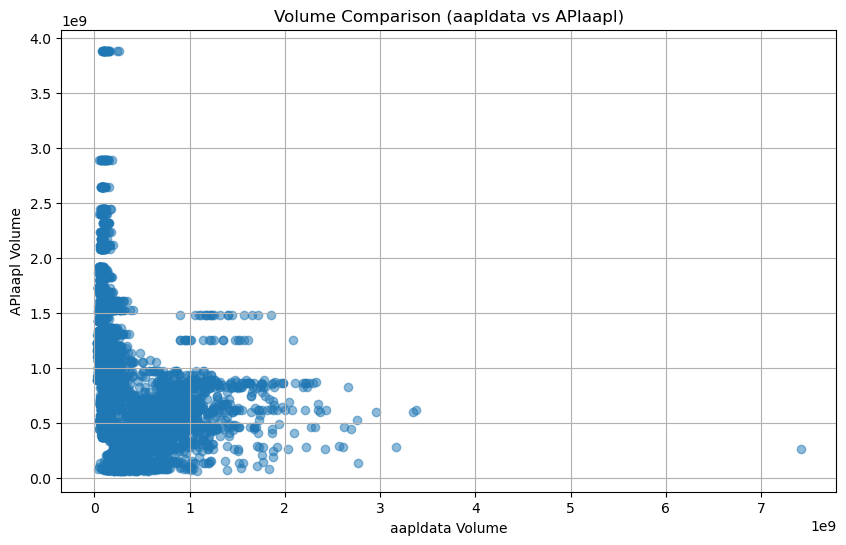

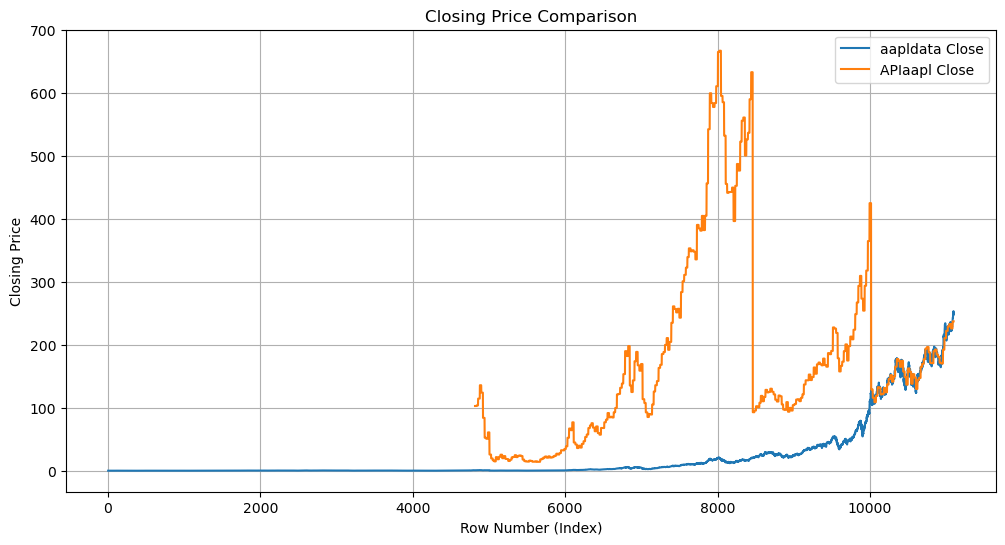

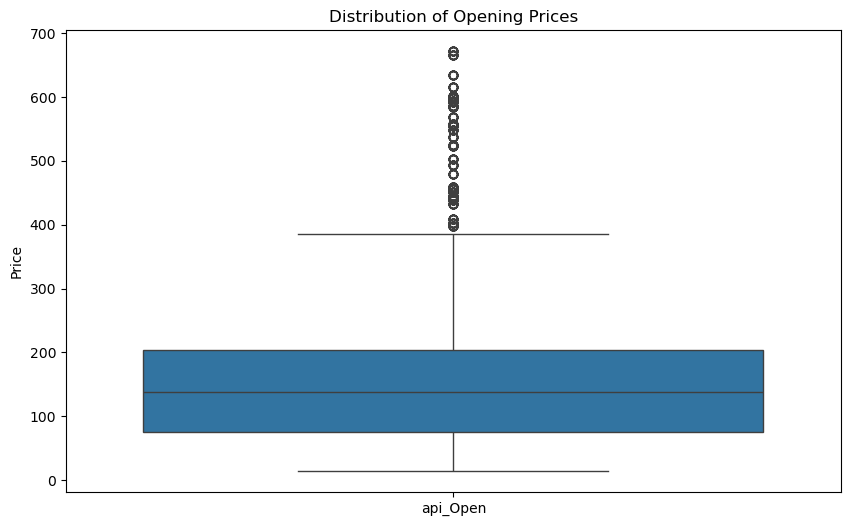

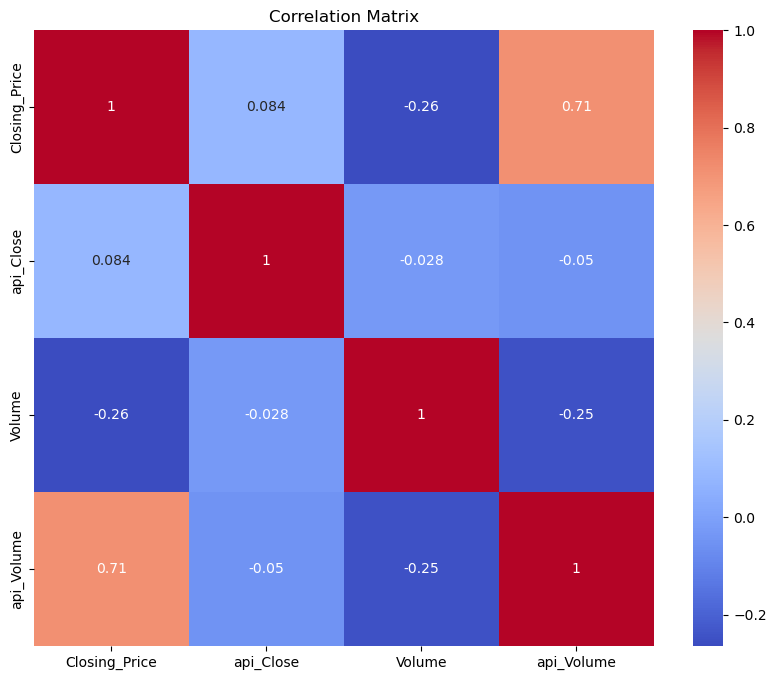

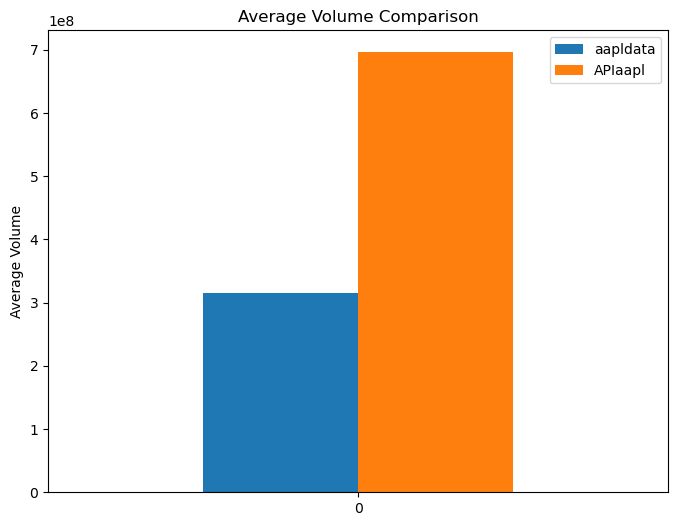

In [265]:
# Step 3 Visualizations: 

# 1. Scatter Plot: Volume Comparison
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Volume'], merged_df['api_Volume'], alpha=0.5)
plt.title('Volume Comparison (aapldata vs APIaapl)')
plt.xlabel('aapldata Volume')
plt.ylabel('APIaapl Volume')
plt.grid(True)
plt.show()

# 2. Line Plot: Closing Price Comparison
plt.figure(figsize=(12, 6))
plt.plot(merged_df.index, merged_df['Closing_Price'], label='aapldata Close')
plt.plot(merged_df.index, merged_df['api_Close'], label='APIaapl Close')
plt.title('Closing Price Comparison')
plt.xlabel('Row Number (Index)')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

# 3. Box Plot: Distribution of Opening Prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df[['Opening_Price', 'api_Open']])
plt.title('Distribution of Opening Prices')
plt.ylabel('Price')
plt.show()

# 4. Heatmap: Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = merged_df[['Closing_Price', 'api_Close', 'Volume', 'api_Volume']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 5. Bar Plot: Average Volume Comparison
avg_volume = pd.DataFrame({
    'aapldata': [merged_df['Volume'].mean()],
    'APIaapl': [merged_df['api_Volume'].mean()]
})
avg_volume.plot(kind='bar', figsize=(8, 6))
plt.title('Average Volume Comparison')
plt.ylabel('Average Volume')
plt.xticks(rotation=0)
plt.show()